# Final Project Work 
## Analysis of data and making of a modal


In [28]:
# importing of all the necessary libraries
import pandas as pd                    #For data manipulation and analysis
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For making graphs
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [29]:
# loading the train.csv file in train_data and test.csv file in the test_data.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [30]:
#Showing all the column names in train_data dataset
train_data.columns  #subscribed is the target variable

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [31]:
#Showing all the column names in test_data dataset
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [34]:
#Seeing the number of rows and columns in the train_data and test_data dataset
train_data.shape, test_data.shape

((31647, 18), (13564, 17))

In [35]:
# Printing the data types for each variable
train_data.dtypes   #object is for categorical variables and int64 is for integer variables.

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [36]:
#Printing first five rows of the dataset by the help of head function(by default 5 rows if no parameter is passed).
train_data.head()  

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

Distribution of the target variable subscribed(Categorical Variable).

In [ ]:
#Frequency table of the subscribed variable
train_data['subscribed'].value_counts()

In [ ]:
# Normalize is True because to print proportions instead of number 
train_data['subscribed'].value_counts(normalize=True)

In [ ]:
# Plotting the bar plot of frequencies of the subscribed variable
train_data['subscribed'].value_counts().plot.bar()     #So, 3715 users out of total 31647 have subscribed which is around 12%.

In [ ]:
#Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.
sn.distplot(train_data["age"])
#The most convenient way to take a quick look at a univariate distribution in seaborn 
#is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).
#We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of
#jobs of the clients. As job is a categorical variable, we will look at its frequency table

In [ ]:
# Plotting the bar plot of frequencies of the job variable
train_data['job'].value_counts().plot.bar()  #Most no of blue-collar people and least no of students do the term deposit.

In [ ]:
# Plotting the bar plot of frequencies of the default variable
train_data['default'].value_counts().plot.bar()  #10% of the people have no default history

## Bivariate Analysis

In [ ]:
#We use the crosstabs in the bivariate analysis for the categorical variables.
#Exploring the job variable against the subscribed variable.

print(pd.crosstab(train_data['job'],train_data['subscribed']))

job=pd.crosstab(train_data['job'],train_data['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')                                    #we can infer that students and retired people have higher chances 
                                                            #of subscribing to a term deposit and blue-collar have lowest chances of 
                                                            #subscribing to a term deposit.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0,0.5,'Percentage')

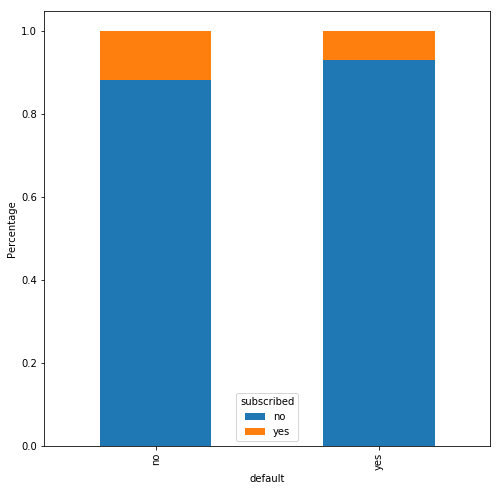

In [7]:
#Exploring the default variable against the subscribed variable.

print(pd.crosstab(train_data['default'],train_data['subscribed']))

default=pd.crosstab(train_data['default'],train_data['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

#We can infer that clients having no previous default have slightly higher chances
#of subscribing to a term loan as compared to the clients who have previous default history.

In [8]:
#Converting target varible into numerical variable
train_data['subscribed'].replace('no', 0,inplace=True)
train_data['subscribed'].replace('yes', 1,inplace=True)

In [10]:
train_data.corr()
#We can infer that duration of the call is directly proportional to the target variable means if a person is taking a lot of time on 
#call means he/she is interested in term deposit plan and higher chances are that he/she can subscribed in the term deposit.

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [11]:
#Looking for missing values in the dataset
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Model Building - Making predictive modal

In [12]:
#Storing the target variable in a separate varible called target
target = train_data['subscribed']
train_data = train_data.drop('subscribed',1)

In [13]:
#Applying dummies on the train dataset
#Converting the categorical variables into numerical values using dummies
train_data = pd.get_dummies(train_data)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Separating the data into train and testing with 20% of data in testing and 80% data in train.
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target, test_size = 0.2, random_state=12)

## Logistic Regression-building model and checking its performance

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Defining the logistic regression model and making the object named lreg of Logistic Regression
lreg = LogisticRegression()

In [18]:
# Fitting the model on  X_train and Y_train
lreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Making prediction on the Testing dataset
prediction = lreg.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Calculating the accuracy score of the model
accuracy_score(Y_test, prediction)
#90% of the accuracy is there

0.9048973143759874

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Defining the decision tree model with depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
# Fitting the decision tree model
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
# making prediction on the testing dataset
predict = clf.predict(X_test)

In [26]:
# Calculating the accuracy score
accuracy_score(Y_test, predict)
#90% of the accuracy is there

0.9042654028436019